<a href="https://colab.research.google.com/github/arif124713/Principle-Component-Analysis/blob/main/pca_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8322,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

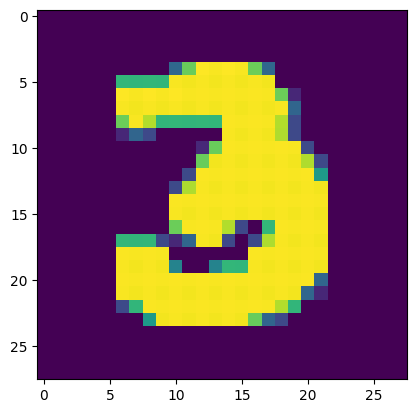

In [ ]:
plt.imshow(df.iloc[39955,1:].values.reshape(28,28))

In [ ]:
x= df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
  y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100)

In [ ]:
x_train = pca.fit_transform(x_train)

In [ ]:
x_test = pca.transform(x_test)

In [ ]:
x_train.shape

(33600, 100)

In [ ]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.954047619047619

In [ ]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023401, 26.74459621, 20.85344791, 18.14891878,
       15.8529825 , 13.87108099, 12.48058959, 11.02794195, 10.09582497,
        9.63317683,  8.62785835,  8.06302725,  7.89511527,  7.44167502,
        7.1703231 ,  6.73265891,  6.6274298 ,  6.41498336,  6.25805945,
        5.90493058,  5.76520019,  5.52080765,  5.3199697 ,  5.18303229,
        4.9342215 ,  4.90645264,  4.71788563,  4.49801056,  4.43101316,
        4.32594445,  4.23445876,  4.10278508,  4.06695969,  4.0228847 ,
        3.84086603,  3.818397  ,  3.71272198,  3.60844782,  3.47094887,
        3.42741935,  3.38736692,  3.28957949,  3.22779702,  3.21494618,
        3.15499679,  3.12358945,  3.10232547,  3.05513229,  3.03502404,
        2.9608264 ,  2.93684843,  2.86242734,  2.82057437,  2.7948368 ,
        2.7665102 ,  2.71502662,  2.68585895,  2.6385908 ,  2.62158613,
        2.5553221 ,  2.52622447,  2.4826246 ,  2.43195414,  2.40470287,
        2.36733591,  2.34652808,  2.31344396,  2.2846734 ,  2.24

In [ ]:
pca.components_
# Eigen vectors

array([[ 9.64393976e-17,  1.97314404e-17, -1.04646287e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.11206703e-16,  1.57710990e-17,  1.00302189e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.17686246e-16, -2.79489139e-17,  2.95500976e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.94799748e-17, -2.53940035e-17, -8.13750748e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.03738944e-17, -4.92562410e-17, -9.32170209e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.54310335e-17,  1.06518177e-17, -1.57728107e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146911, 0.01123027, 0.01058528,
       0.0101993 , 0.00957675, 0.00942707, 0.00912488, 0.00890167,
       0.00839937, 0.00820061, 0.00785298, 0.0075673 , 0.00737251,
       0.0070186 , 0.0069791 , 0.00671088, 0.00639812, 0.00630282,
       0.00615337, 0.00602323, 0.00583594, 0.00578498, 0.00572228,
       0.00546337, 0.00543141, 0.0052811 , 0.00513277, 0.00493719,
       0.00487527, 0.0048183 , 0.00467921, 0.00459132, 0.00457304,
       0.00448777, 0.0044431 , 0.00441285, 0.00434572, 0.00431712,
       0.00421158, 0.00417747, 0.00407161, 0.00401208, 0.00397547,
       0.00393517, 0.00386194, 0.00382045, 0.00375322, 0.00372903,
       0.00363477, 0.00359338, 0.00353137, 0.00345929, 0.00342053,
       0.00336738, 0.00333778, 0.00329072, 0.00324979, 0.00319152,
       0.00316045, 0.00307288, 0.00305104, 0.00302322, 0.00298

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294567,
       0.29664822, 0.30892077, 0.32038988, 0.33162015, 0.34220544,
       0.35240474, 0.36198149, 0.37140857, 0.38053345, 0.38943512,
       0.39783448, 0.40603509, 0.41388807, 0.42145537, 0.42882789,
       0.43584648, 0.44282558, 0.44953646, 0.45593458, 0.46223739,
       0.46839076, 0.47441399, 0.48024993, 0.48603491, 0.49175719,
       0.49722056, 0.50265198, 0.50793307, 0.51306585, 0.51800304,
       0.52287831, 0.52769661, 0.53237582, 0.53696714, 0.54154019,
       0.54602796, 0.55047106, 0.55488391, 0.55922963, 0.56354674,
       0.56775832, 0.57193579, 0.5760074 , 0.58001948, 0.58399494,
       0.58793012, 0.59179206, 0.59561252, 0.59936573, 0.60309476,
       0.60672954, 0.61032292, 0.61385429, 0.61731358, 0.62073411,
       0.62410148, 0.62743926, 0.63072998, 0.63397978, 0.63717129,
       0.64033174, 0.64340462, 0.64645566, 0.64947888, 0.65246

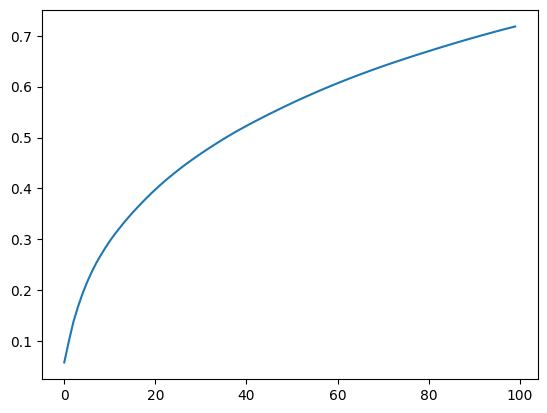

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))